In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

-5.2835413068750805 -18.504917178757204


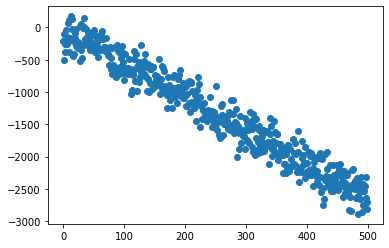

In [2]:
max_x = 500
slope_range = [.1, 10] #too low a slope and you will have very little covariance and poor regressions
slope_direction = np.random.choice([-1,1])
intercept_range = [-40, 40]
residual_var = 100
X = torch.from_numpy(np.arange(max_x))
X = X.type(torch.float64)
m = np.random.uniform(*slope_range) * slope_direction
b = np.random.uniform(*intercept_range)
y = m * X + b + np.random.normal(0, residual_var, len(X)) * m/3
print(m, b)
plt.scatter(X, y)

In [3]:
class Model:
    def __init__(self, params):
        self.parameters = params # weights for slope and bias (could have been stored outside of model)
        self.y_pred = None # Will hold last prediction when training loop is done
    def set_learning_objects(self, criterion, optimizer):
        self.criterion = criterion
        self.optimizer = optimizer
    def train(self, X):
        return self.parameters[0][0] * X + self.parameters[0][1] # Just a simple line eq. with current m and b weights
    def training_loop(self, epochs, X, y):
        for epoch in [e+1 for e in range(epochs)]: # Make ephochs 1 based
            self.y_pred = self.train(X) # No batching here, we run all data and adjust the weights after the run
            loss = self.criterion(self.y_pred, y) # What ever loss function that was passed is used
            self.optimizer.zero_grad() # Gradients sum with each back prop, so we need to manually zero out the last derivatives
            loss.backward() # The acutal back proagation
            self.optimizer.step() # Updates the weights (self.parameters)
            if epoch % 10 == 0 or epoch == np.max(range(epochs)):
                print("Epoch: {} - Loss: {}".format(epoch, float(loss)))

In [4]:
weights = np.random.normal(.7, .01) #No specal sauce here, but we don't want to start at the extreams (too near 0 or 1)
weights

0.7075600326455369

In [5]:
bias = np.random.normal(0, .01) #No specal sauce here, but we don't want to start at the extreams (too near 0 or 1)
bias

-0.002120932315731302

In [6]:
#weights are a enumerable tensor.  In our simple r1 maps to r1, it is just 2 trainable paramaters
weights_bias = torch.tensor([weights, bias], requires_grad=True) # requires_grad=True maintains the state for the back prop

In [7]:
model = Model([weights_bias])

#hyper-parameters
epochs = 500
learning_rate = 1e-5

#loss
# criterion = torch.nn.MSELoss()
# criterion = torch.nn.SmoothL1Loss()
# criterion = torch.nn.L1Loss()
# criterion = lambda y, y_pred : torch.mean((y - y_pred)**2)
criterion = lambda y, y_pred : torch.mean(abs(y - y_pred))

# back prop gradient decent optimizer
# optimizer = optim.SGD(model.parameters, lr=learning_rate)
optimizer = optim.SGD(model.parameters, lr=learning_rate, momentum=0.9)
# optimizer = optim.Adam(model.parameters)


model.set_learning_objects(criterion, optimizer)

In [8]:
y_pred = model.train(X)
model.parameters
#This is just a made up linear plot with random slope and intercept since no parameter training was done
# plt.scatter(y, y_pred) 

[tensor([ 0.7076, -0.0021], requires_grad=True)]

In [9]:
criterion(y, y_pred)

tensor(1511.5741, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [10]:
model.training_loop(epochs, X, y)

Epoch: 10 - Loss: 1489.9651155614793
Epoch: 20 - Loss: 1442.0654877069057
Epoch: 30 - Loss: 1385.0306284616656
Epoch: 40 - Loss: 1324.8249626516842
Epoch: 50 - Loss: 1263.5237790150636
Epoch: 60 - Loss: 1201.874180048655
Epoch: 70 - Loss: 1140.1510388848192
Epoch: 80 - Loss: 1078.5377417083912
Epoch: 90 - Loss: 1016.9771053060748
Epoch: 100 - Loss: 955.436682723059
Epoch: 110 - Loss: 893.9900595057844
Epoch: 120 - Loss: 832.6224555355618
Epoch: 130 - Loss: 771.4966666907403
Epoch: 140 - Loss: 710.5570449085653
Epoch: 150 - Loss: 649.8452749773035
Epoch: 160 - Loss: 589.4654760459144
Epoch: 170 - Loss: 529.8356372389596
Epoch: 180 - Loss: 470.67776713528224
Epoch: 190 - Loss: 412.61291066276715
Epoch: 200 - Loss: 355.6990833789301
Epoch: 210 - Loss: 302.23900857335946
Epoch: 220 - Loss: 253.75241041483991
Epoch: 230 - Loss: 211.67467466014548
Epoch: 240 - Loss: 179.7316620855577
Epoch: 250 - Loss: 160.71206978609692
Epoch: 260 - Loss: 150.13022213389118
Epoch: 270 - Loss: 145.4146184620

In [11]:
model.parameters
pred_slope = model.parameters[0][0].item()
pred_intercept = model.parameters[0][1].item()
print ("Actual Slope: {}  Actual Intercept: {}".format(m, b))
print ("Model Slope: {}  Model Intercept: {}".format(pred_slope, pred_intercept))

Actual Slope: -5.2835413068750805  Actual Intercept: -18.504917178757204
Model Slope: -5.365102291107178  Model Intercept: -0.02562970109283924


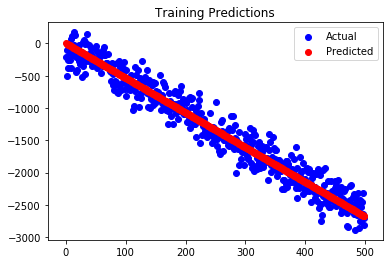

In [12]:
plt.scatter(X, y, color='b', label='Actual')
plt.scatter(X, model.y_pred.detach().numpy(), color='r', label='Predicted')
plt.title('Training Predictions')
plt.legend()
plt.show()